# Keypoint speed 

In [1]:
""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
from collections import defaultdict
import pandas as pd
from scipy.ndimage import gaussian_filter1d

from one.api import ONE
import matplotlib.pyplot as plt

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from video_functions import  get_dlc_XYs, get_raw_and_smooth_position, get_pupil_diameter, stack_pupil, pupil_center, keypoint_speed_one_camera
from one_functions_generic import prepro

one = ONE()


### Get data

In [2]:
# Parameters 
eid = '572a95d1-39ca-42e1-8424-5c9ffcb2df87'  # Example session
# eid = '15f742e1-1043-45c9-9504-f1e8a53c1744'
video_type = 'left'
ephys=True

# Data


# Nose velocity
nose_speeds = keypoint_speed(eid, True, 'nose_tip', True)
nose_times = nose_speeds['left'][0][1:]
nose_speed_X = nose_speeds['left'][1]
nose_speed_Y = nose_speeds['left'][2]

# Left paw velocity
left_p_speeds = keypoint_speed(eid, True, 'paw_r', True)
left_p_times = left_p_speeds['left'][0][1:]
left_p_speed_X = left_p_speeds['left'][1]
left_p_speed_Y = left_p_speeds['left'][2]

# Pupil velocity
pupil_speeds = keypoint_speed(eid, True, pupil_center, True)
pupil_times = pupil_speeds['left'][0][1:]
pupil_speed_X = pupil_speeds['left'][1]
pupil_speed_Y = pupil_speeds['left'][2]
        

# Trials data
trials_mouse = one.load_object(eid, obj='trials', namespace='ibl')
trials_df = trials_mouse.to_df()
processed_trials = prepro(trials_df)


/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
local md5 mismatch on dataset: cortexlab/Subjects/KS020/2020-02-07/001/alf/_ibl_trials.goCueTrigger_times.npy


Downloading: /home/ines/Downloads/ONE/openalyx.internationalbrainlab.org/cortexlab/Subjects/KS020/2020-02-07/001/alf/_ibl_trials.goCueTrigger_times.304738a6-9753-4607-8110-d9e3fa2adfde.npy Bytes: 2840


100%|██████████| 0.00270843505859375/0.00270843505859375 [00:00<00:00,  2.86s/it]


### Stack data

In [5]:
# Plotting
event = 'stimOn_times'
event = 'feedback_times'
events = ['stimOn_times', 'firstMovement_onset', 'feedback_times']
t_init = 0.5
t_end = 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

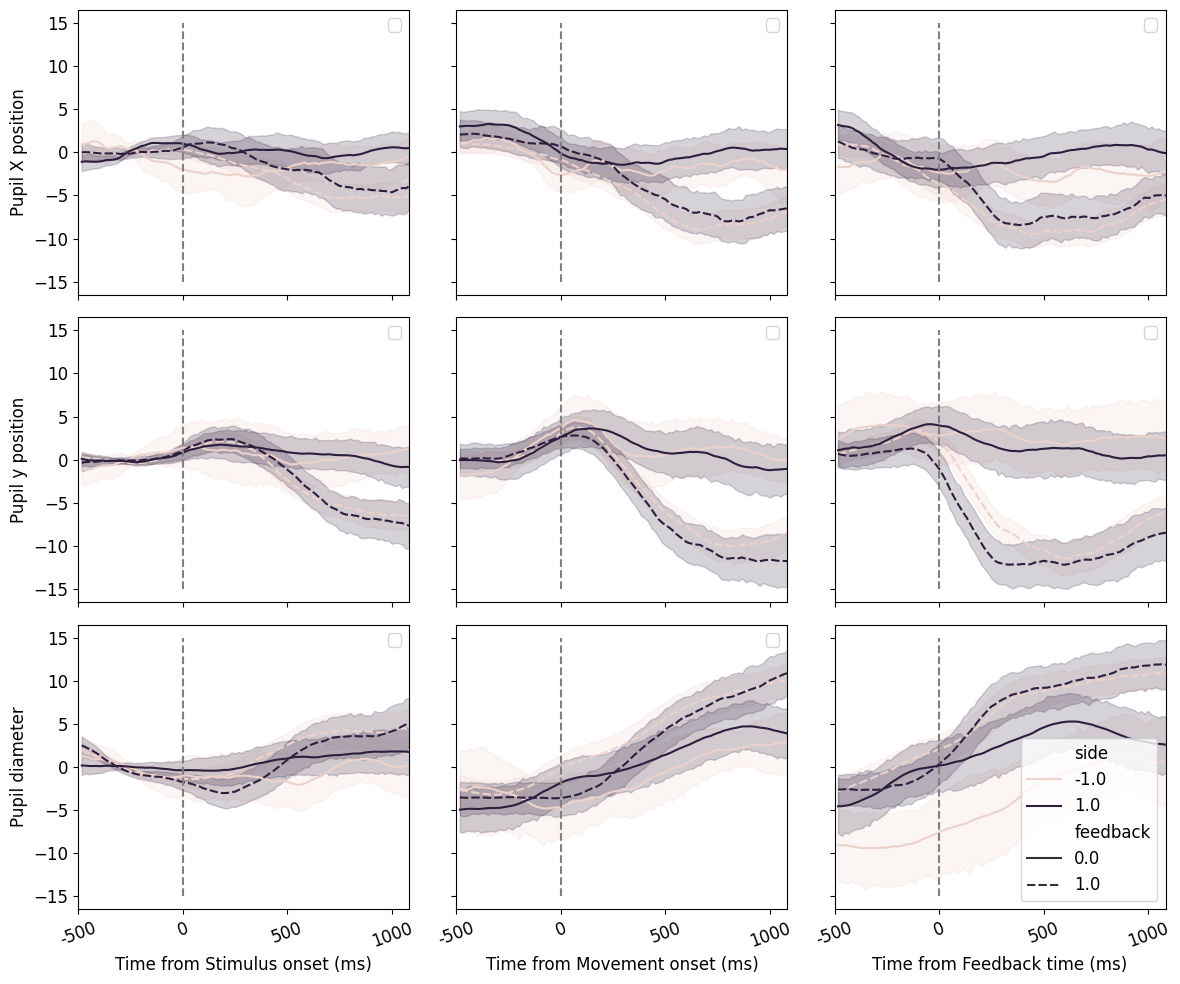

In [14]:

# Parameters 
eid = '572a95d1-39ca-42e1-8424-5c9ffcb2df87'  # Example session
# eid = '15f742e1-1043-45c9-9504-f1e8a53c1744'
video_type = 'left'
ephys=True

# Nose velocity
nose_speeds = keypoint_speed(eid, True, 'nose_tip', False)
nose_times = nose_speeds['left'][0][1:]
nose_speed = nose_speeds['left'][1]

# Left paw velocity
left_p_speeds = keypoint_speed(eid, True, 'paw_r', False)
left_p_times = left_p_speeds['left'][0][1:]
left_p_speed = left_p_speeds['left'][1]

# Pupil velocity
pupil_speeds = keypoint_speed(eid, True, pupil_center, False)
pupil_times = pupil_speeds['left'][0][1:]
pupil_speed = pupil_speeds['left'][1]
        

# Trials data
trials_mouse = one.load_object(eid, obj='trials', namespace='ibl')
trials_df = trials_mouse.to_df()
processed_trials = prepro(trials_df)



to_plot = [left_p_speeds, nose_speeds, pupil_speeds]
to_plot_speeds = [left_p_times, nose_times, pupil_times]
label = ['Paw speed', 'Nose speed', 'Pupil speed']
events = ['stimOn_times', 'firstMovement_times', 'feedback_times']
event_label = ['Stimulus onset', 'Movement onset', 'Feedback time']

fig, ax = plt.subplots(nrows=3 , ncols=3, sharex=True, sharey=True, figsize=[12, 10])

for p, pos in enumerate(to_plot):

       position = pos
       time = to_plot_speeds[p][0:len(position)]
       trials = trials_df
       trials = processed_trials
       for ev, event in enumerate(events):
              stacked_data, stack_time = stack_pupil(position, time, trials, event, t_init, t_end)

              pupil_stack = pd.DataFrame(stacked_data[:,0:100])
              pupil_stack['feedback'] = list(processed_trials['correct'])
              pupil_stack['choice'] = list(processed_trials['choice'])
              pupil_stack['contrast'] = list(processed_trials['contrast'])
              pupil_stack['side'] = list(np.sign(processed_trials['signed_contrast']))

              melted = pd.melt(pupil_stack, id_vars=['feedback', 'choice', 'contrast', 'side'], value_vars=np.array(pupil_stack.keys()[1:-4]))
              correct_data = melted.loc[(melted['contrast']>0) & (melted['contrast']<=1) & (melted['feedback']==1)]
              incorrect_data = melted.loc[(melted['contrast']>0) & (melted['contrast']<=1) & (melted['feedback']==0)]
              use_data = melted.loc[(melted['contrast']>0) & (melted['contrast']<=1)]
              plt.rc('font', size=12)
              if ev == 2 & p == 2:
                     sns.lineplot(x='variable', y='value', hue='side',style='feedback', data=use_data, ax=ax[p, ev])  #  style='feedback',
              else:
                     sns.lineplot(x='variable', y='value', hue='side',style='feedback', data=use_data, ax=ax[p, ev], legend=None)  #  style='feedback',
              ax[p, ev].vlines(30, -15, 15, linestyles='dashed', color='Gray')
              ax[p, ev].set_xlabel(str('Time from '+ event_label[ev] +' (ms)'))
              ax[p, ev].set_ylabel(label[p])
              ax[p, ev].set_xticks([0, 30, 60, 90], [-500, 0, 500, 1000],
                     rotation=20)
              ax[p, ev].set_xlim([0, 95])
              ax[p, ev].legend()
              # plt.title(eid)

plt.tight_layout()
plt.show()


## Loop through sessions

In [2]:
# Choose a session with good QC
data_path = '/home/ines/repositories/representation_learning_variability/Video and wheel/'
# data_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Video and wheel/'

os.chdir(data_path)
pass_qc = pickle.load(open(data_path + "good_dlc_bwm_sessions_metadata", "rb"))


In [7]:
# Parameters 
video_type = 'left'
ephys=True

# Plotting

label = ['Paw speed', 'Nose speed', 'Pupil speed']
events = ['stimOn_times', 'firstMovement_times', 'feedback_times']
event_label = ['Stimulus onset', 'Movement onset', 'Feedback time']

t_init = 0.5
t_end = 2

In [11]:
for e, eid in enumerate(pass_qc['session_uuid']):
    
#     try:

        # Nose velocity
        nose_speeds = keypoint_speed_one_camera(eid, True, 'left', 'nose_tip', False) 
        nose_times = nose_speeds['left'][0][1:]
        nose_speed = nose_speeds['left'][1]

NameError: name 'keypoint_speed_one_camera' is not defined

/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose

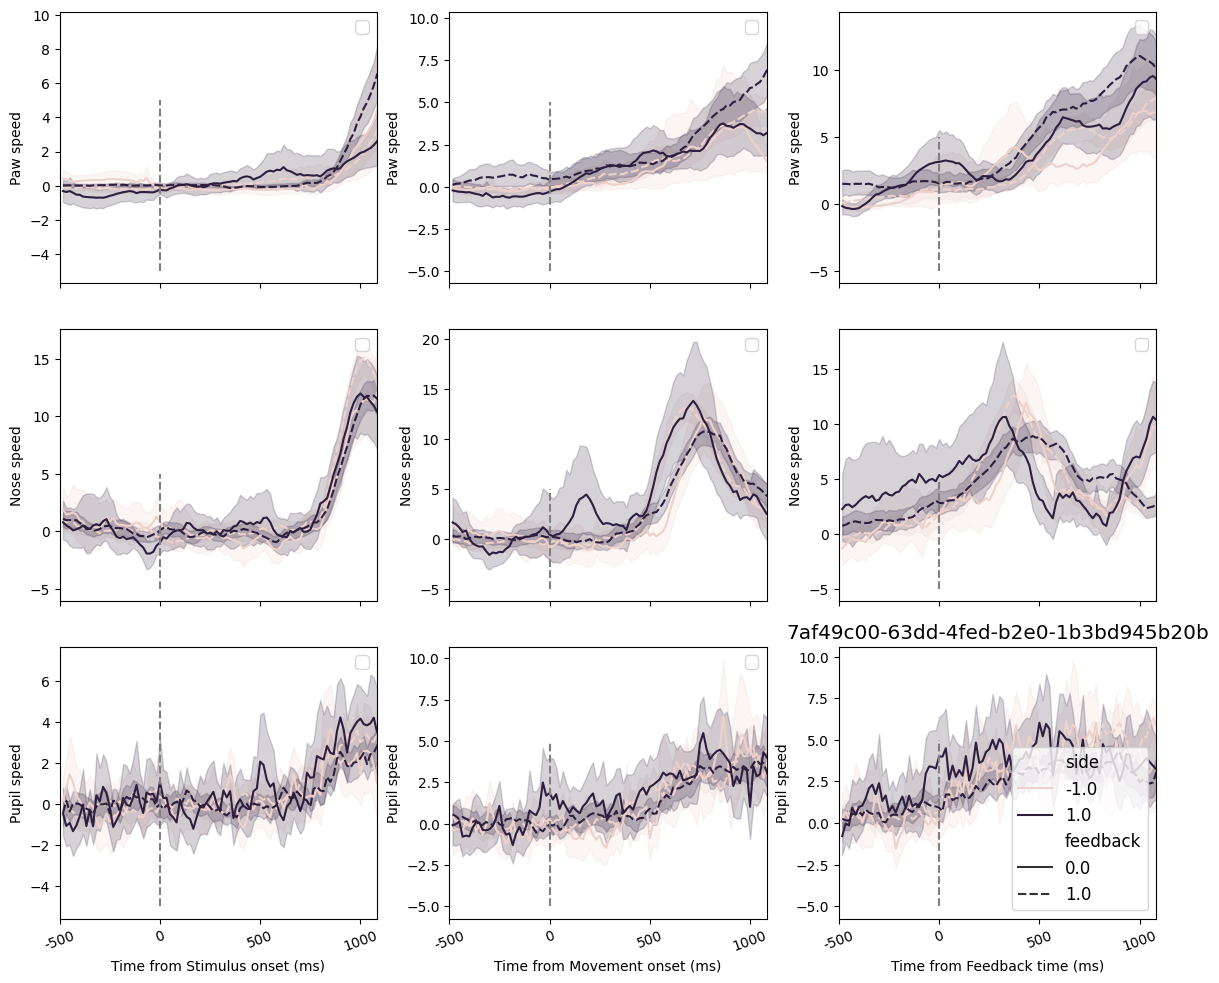

/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose

<Figure size 640x480 with 0 Axes>

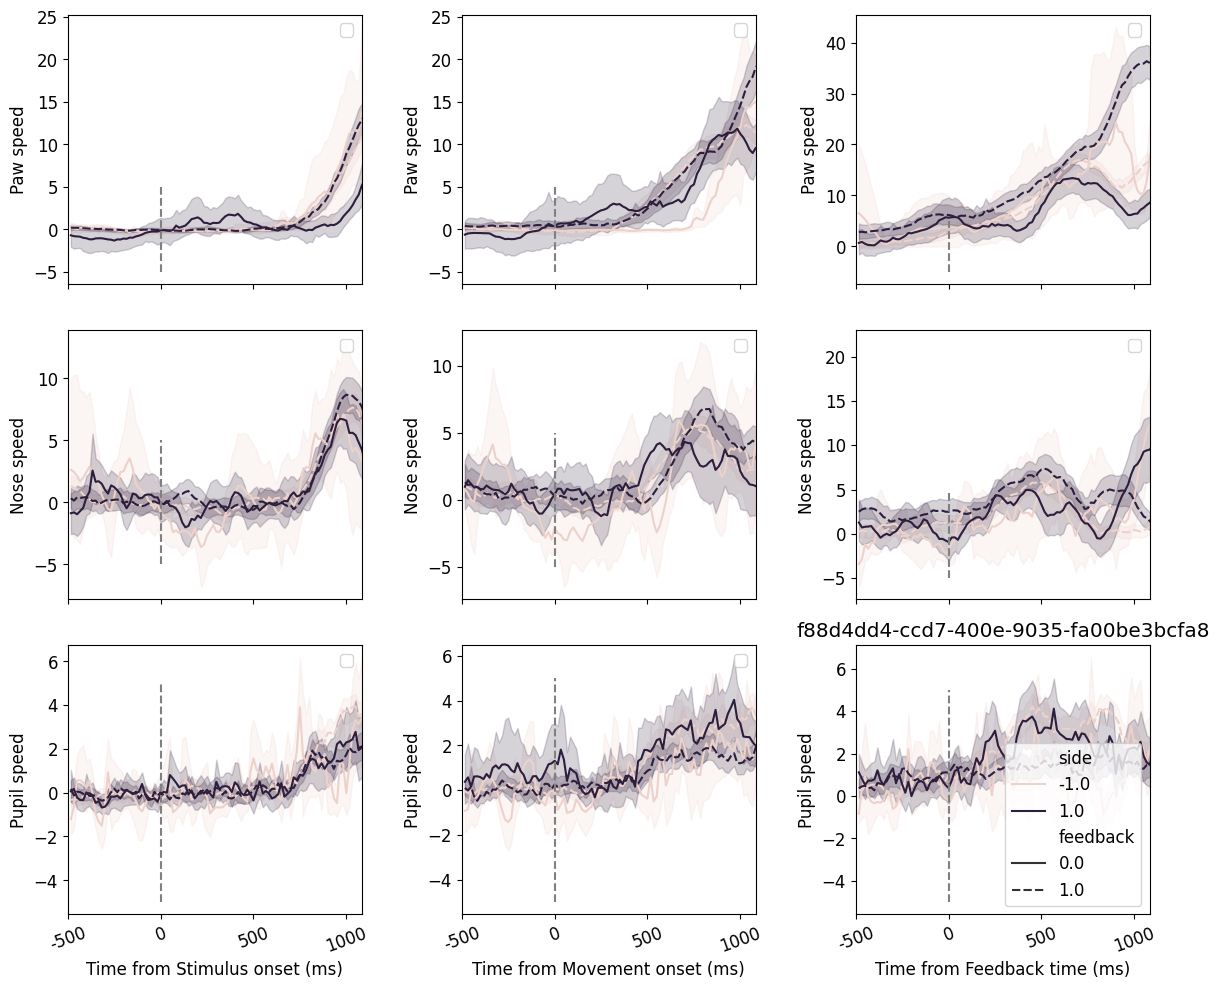

/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose

<Figure size 640x480 with 0 Axes>

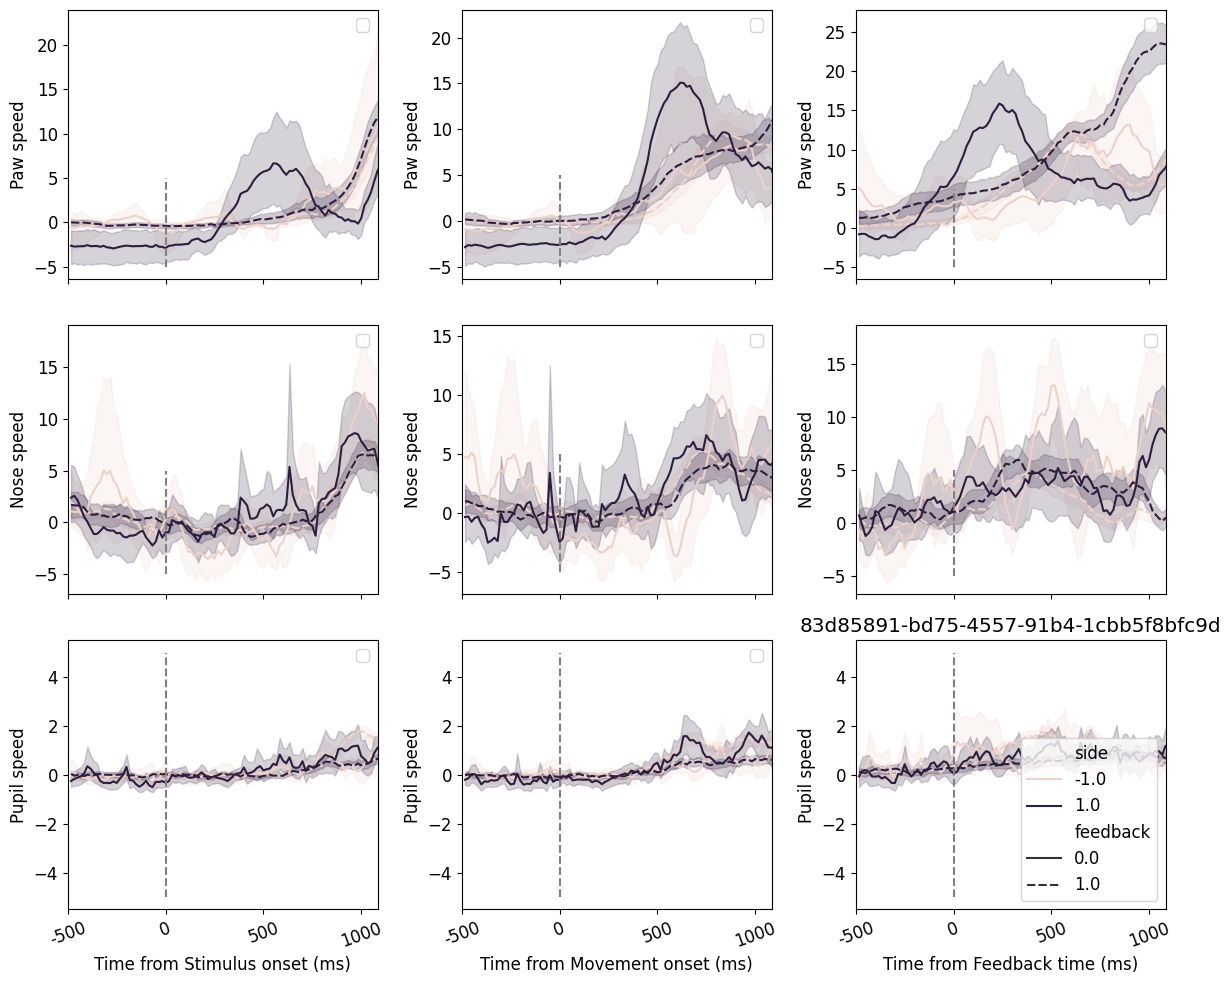

/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:452: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:453: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose

<Figure size 640x480 with 0 Axes>

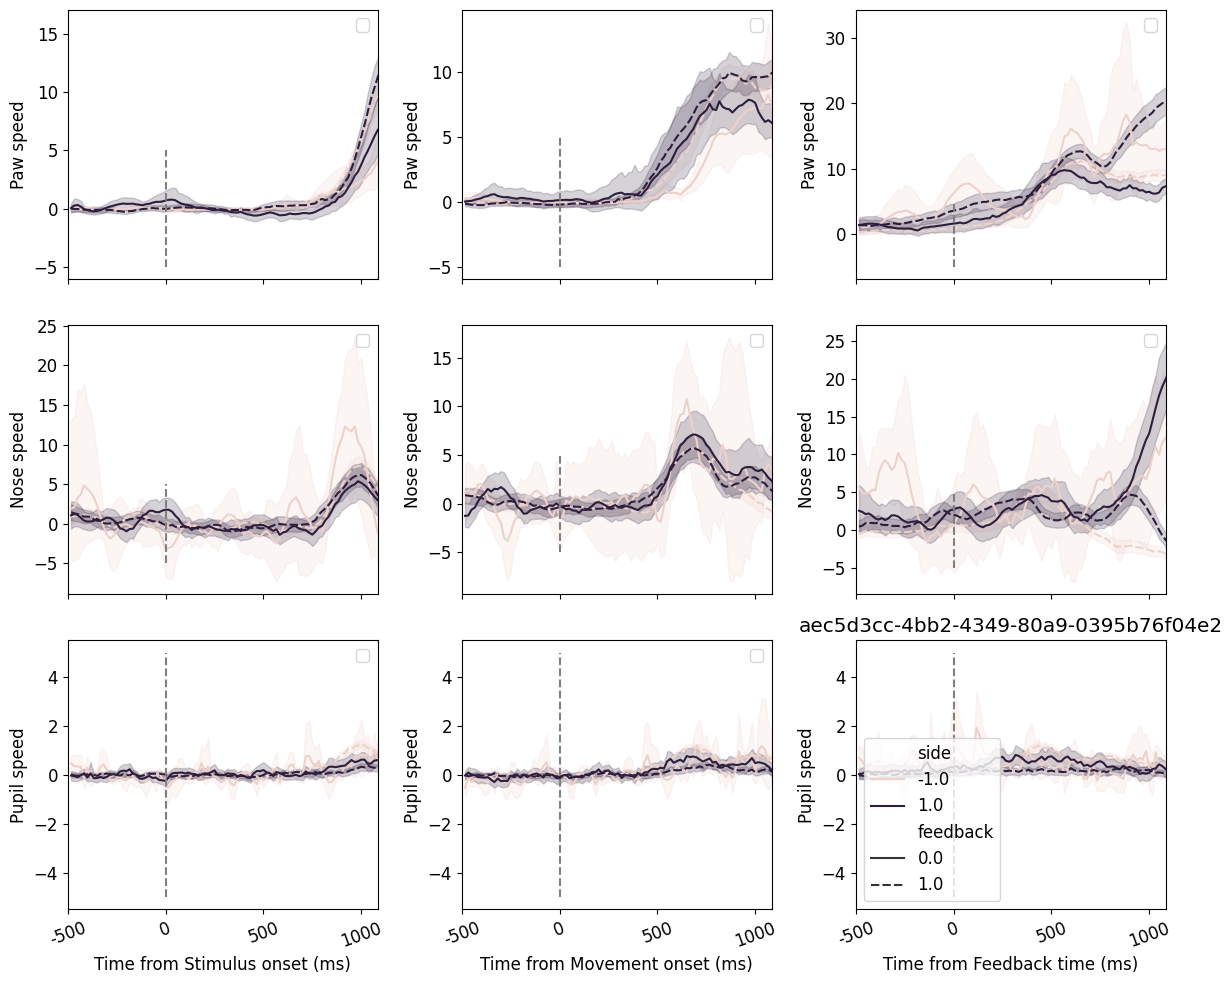

ArrowInvalid: Could not open Parquet input source '/home/ines/Downloads/ONE/openalyx.internationalbrainlab.org/angelakilab/Subjects/NYU-39/2021-05-13/002/alf/_ibl_rightCamera.dlc.pqt': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

<Figure size 640x480 with 0 Axes>

In [10]:
for e, eid in enumerate(pass_qc['session_uuid']):
    
#     try:

        # Nose velocity
        nose_speeds = keypoint_speed_one_camera(eid, True, 'left', 'nose_tip', False) 
        nose_times = nose_speeds['left'][0][1:]
        nose_speed = nose_speeds['left'][1]

        # Left paw velocity
        left_p_speeds = keypoint_speed_one_camera(eid, True, 'left', 'paw_r', False)
        left_p_times = left_p_speeds['left'][0][1:]
        left_p_speed = left_p_speeds['left'][1]

        # Pupil velocity
        pupil_speeds = keypoint_speed_one_camera(eid, True, 'left', pupil_center, False)
        pupil_times = pupil_speeds['left'][0][1:]
        pupil_speed = pupil_speeds['left'][1]
                
        # Trials data
        trials_mouse = one.load_object(eid, obj='trials', namespace='ibl')
        trials_df = trials_mouse.to_df()
        processed_trials = prepro(trials_df)

        to_plot = [left_p_speed, nose_speed, pupil_speed]
        to_plot_speeds = [left_p_times, nose_times, pupil_times]

        fig, ax = plt.subplots(nrows=3 , ncols=3, sharex=True, sharey=False, figsize=[12, 10])

        for p, pos in enumerate(to_plot):

                position = pos
                time = to_plot_speeds[p][0:len(position)]
                trials = trials_df
                trials = processed_trials
                for ev, event in enumerate(events):
                        stacked_pupil, stack_time = stack_pupil(position, time, trials, event, t_init, t_end)

                        pupil_stack = pd.DataFrame(stacked_pupil[:,0:100])
                        pupil_stack['feedback'] = list(processed_trials['correct'])
                        pupil_stack['choice'] = list(processed_trials['choice'])
                        pupil_stack['contrast'] = list(processed_trials['contrast'])
                        pupil_stack['side'] = list(np.sign(processed_trials['signed_contrast']))

                        melted = pd.melt(pupil_stack, id_vars=['feedback', 'choice', 'contrast', 'side'], value_vars=np.array(pupil_stack.keys()[1:-4]))
                        correct_data = melted.loc[(melted['contrast']>0) & (melted['contrast']<=1) & (melted['feedback']==1)]
                        incorrect_data = melted.loc[(melted['contrast']>0) & (melted['contrast']<=1) & (melted['feedback']==0)]
                        use_data = melted.loc[(melted['contrast']>0) & (melted['contrast']<=1)]
                        plt.rc('font', size=12)
                        if ev == 2 & p == 2:
                                sns.lineplot(x='variable', y='value', hue='side',style='feedback', data=use_data, ax=ax[p, ev])  #  style='feedback',
                        else:
                                sns.lineplot(x='variable', y='value', hue='side',style='feedback', data=use_data, ax=ax[p, ev], legend=None)  #  style='feedback',
                        ax[p, ev].vlines(30, -5, 5, linestyles='dashed', color='Gray')
                        ax[p, ev].set_xlabel(str('Time from '+ event_label[ev] +' (ms)'))
                        ax[p, ev].set_ylabel(label[p])
                        ax[p, ev].set_xticks([0, 30, 60, 90], [-500, 0, 500, 1000],
                                rotation=20)
                        ax[p, ev].set_xlim([0, 95])
                        ax[p, ev].legend()
                        plt.title(eid)

        plt.tight_layout()
        plt.show()
        fig_name = str('keypoint_speed_PSTH_'+eid+'png')
        plt.savefig(fig_name)

#     except:
#         print(str('Something wrong with ' + eid))
    

(0.0, 500.0)

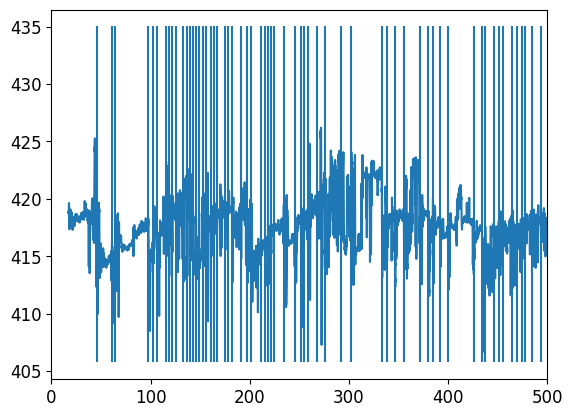

In [69]:
plt.plot(times[0:len(pupil_dia_smooth_left)], pupil_dia_smooth_left)
onset_times = list(trials[event])
for t, trial in enumerate(onset_times):
    plt.vlines(trial, np.nanmin(pupil_dia_smooth_left), np.nanmax(pupil_dia_smooth_left))
plt.xlim([0, 500])